In [7]:
import os
os.environ['DATA_PATH'] = '../../FeatureExtractionOutLCC/'

import pandas as pd
pd.set_option('display.max_rows', 100)

import scipy
import seaborn as sns
import sys
sys.path.append('../nemo-eva/src/')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
df_clean = pd.read_csv(os.environ['DATA_PATH'] + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: var for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
df_clean.shape

df_raw = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')
import feature_cleaner
graph_dicts = df_raw.to_dict('records')
fc = feature_cleaner.FeatureCleaner(graph_dicts)
fc.resultspath = './temp/results.csv'
fc._stagepath = './temp/'
fc.resultspath

(1800, 239)

'./temp/results.csv'

In [43]:
fc.execute()


Feature: 296 ( unfiltered: 346 )
missing graphs for 1d-cube-girg model: {'bn-human-BNU_1_0025873_session_1-bg', 'bn-human-BNU_1_0025889_session_2', 'ca-GrQc', 'socfb-UC61'}
missing graphs for ER model: {'bn-human-BNU_1_0025873_session_1-bg', 'bn-human-BNU_1_0025889_session_2'}
missing graphs for 2d-cube-girg model: {'bn-human-BNU_1_0025873_session_1-bg', 'bn-human-BNU_1_0025889_session_2', 'socfb-Baylor93', 'soc-themarker', 'ca-GrQc', 'socfb-Syracuse56', 'socfb-UC61', 'socfb-Temple83'}
missing graphs for chung-lu model: {'bn-human-BNU_1_0025873_session_1-bg', 'bn-human-BNU_1_0025889_session_2'}
missing graphs for 3d-cube-girg model: {'bn-human-BNU_1_0025873_session_1-bg', 'bn-human-BNU_1_0025889_session_2', 'socfb-Baylor93', 'socfb-GWU54', 'ca-GrQc', 'soc-loc-brightkite', 'socfb-Stanford3', 'soc-themarker', 'ia-wiki-Talk', 'soc-brightkite', 'socfb-NotreDame57', 'socfb-Syracuse56', 'soc-anybeat', 'socfb-USF51', 'ia-enron-email-dynamic', 'ia-wikiquote-user-edits', 'socfb-UC61', 'socfb-Te

/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:47: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_real = df_real.loc[complete_graphs]
/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:48: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_cleaned = df_features_cleaned.loc[complete_graphs]
/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:99: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variation = df_finite_filtered.std() / df_finite_filtered.mean() / (len(df_finite_filtered)-1)**0.5
/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:106: SettingWithCopyWarning: 
A value is trying to be

In [3]:
df_clean.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']].sort_values(['Graph', 'Model'])

,Graph,Model,Type,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
1257,bio-celegans,1d-girg,bio,453,2080,2.7038445289395856,0.671244,9.183223
1258,bio-celegans,2d-girg,bio,449,2021,7.547169811320754,0.703790,9.002227
1259,bio-celegans,3d-girg,bio,453,2035,100.0,0.525261,8.984547
1253,bio-celegans,BA circle,bio,453,2025,None,0.053591,8.940397
1254,bio-celegans,BA full,bio,453,2025,None,0.062948,8.940397
...,...,...,...,...,...,...,...,...
1011,web-webbase-2001,BA full,web,16062,25593,None,0.001381,3.186776
1009,web-webbase-2001,ER,web,15340,25625,None,0.000194,3.340939
1012,web-webbase-2001,chung-lu,web,11704,25084,None,0.036669,4.286398
1013,web-webbase-2001,hyperbolic,web,14096,19802,1.795735,0.223127,2.809591


In [5]:
df_clean.loc[1257].Info

{'tau': '2.604100935449141',
 'alpha': '2.7038445289395856',
 'const': '1.2771283677683574',
 'target_lcc': '0.6464630921565051',
 'fit_lcc': '0.6712435672272826',
 'fitting_time': '0.2077770233154297',
 'hist': '[(2.0, 0.5418299117559976), (3.9215686274509802, 0.7502020388664506), (2.6490066225165565, 0.6599827891883883), (3.162055335968379, 0.6848214378095011), (2.8828828828828823, 0.71309154265214), (2.76100086281277, 0.6880637685102278), (2.7038445289395856, 0.6540454422037603), (2.6761446790717125, 0.674254081729609), (2.6899232951560363, 0.6672508776435662), (2.696865946800105, 0.6752055712698382), (2.7038445289395856, 0.6540454422037603)]'}

In [9]:
DP = os.environ['DATA_PATH']
all_df = pd.read_csv(DP + '4-classification_results/accuracies/all.csv').T
small_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-le-30.csv').T
large_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-gt-30.csv').T
socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/socfb.csv').T
not_socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/not-socfb.csv').T
for df in [all_df, small_deg_df, large_deg_df, socfb_df, not_socfb_df]:
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace=True)

In [10]:
all_df.columns

Index(['1d-girg', '2d-girg', '3d-girg', 'BA circle', 'BA full', 'ER',
       'chung-lu', 'hyperbolic'],
      dtype='object', name='features')

In [11]:
all_df.loc[:, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '1d-cube-girg', '2d-cube-girg']]

KeyError: "['1d-cube-girg', '2d-cube-girg'] not in index"

In [14]:
all_df.loc[:, ['ER', 'hyperbolic', '1d-girg', '1d-cube-girg']]

features,ER,hyperbolic,1d-girg,1d-cube-girg
"Betweenness,Closeness,Diameter Max - mean",0.880117,0.894737,0.847953,0.818713
"Betweenness,Closeness,Diameter Max - median",0.938596,0.888889,0.859649,0.850877
"Betweenness,Closeness,Diameter Max - stats",0.97076,0.874269,0.865497,0.874269
"Betweenness,Closeness,Effective Diameter - mean",0.789474,0.605263,0.616959,0.605263
"Betweenness,Closeness,Effective Diameter - median",0.918129,0.654971,0.859649,0.842105
...,...,...,...,...
"Nodes,Edges,Partition.Communities - stats",0.827485,0.888889,0.856725,0.883041
"Nodes,Edges,Partition.CoreDecomposition - mean",0.915205,0.871345,0.862573,0.853801
"Nodes,Edges,Partition.CoreDecomposition - median",0.842105,0.833333,0.804094,0.812865
"Nodes,Edges,Partition.CoreDecomposition - stats",0.964912,0.885965,0.874269,0.874269


TtestResult(statistic=-2.25027519232989, pvalue=0.9868249340710826, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

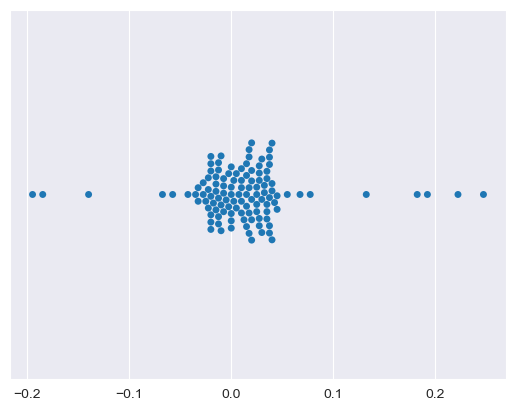

In [12]:
pre, post = all_df.loc[:, 'hyperbolic'].to_numpy(), all_df.loc[:, '1d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-2.145745351774348, pvalue=0.9829928764991379, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

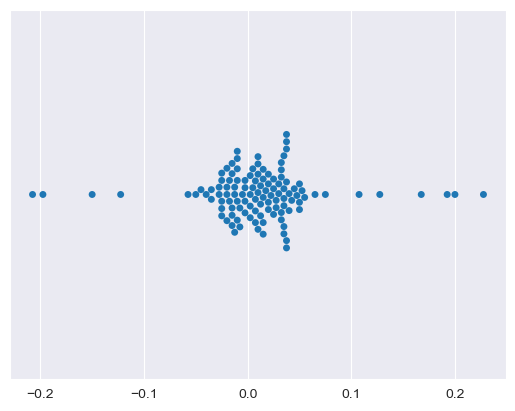

In [13]:
pre, post = all_df.loc[:, 'hyperbolic'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=0.13135388994123645, pvalue=0.447863448191251, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

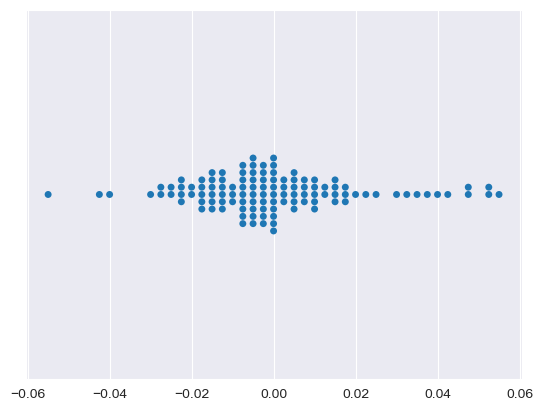

In [14]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=2.8606223785379057, pvalue=0.0025152896662757815, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

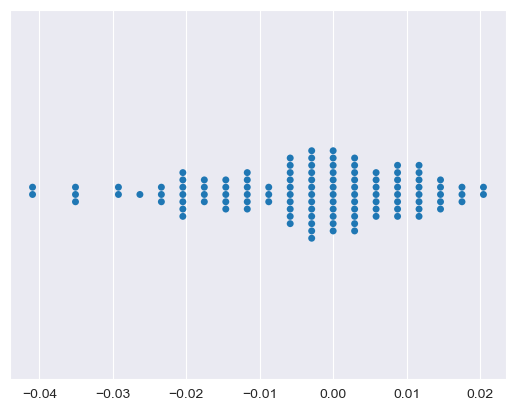

In [18]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-1.8159677602875002, pvalue=0.9639982931603974, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

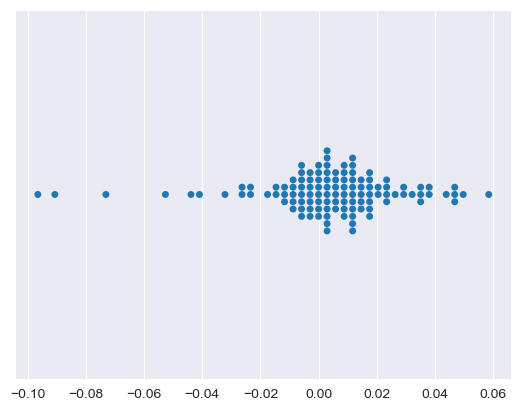

In [22]:
pre, post = all_df.loc[:, '2d-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-2.961915518981285, pvalue=0.9981393088533485, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

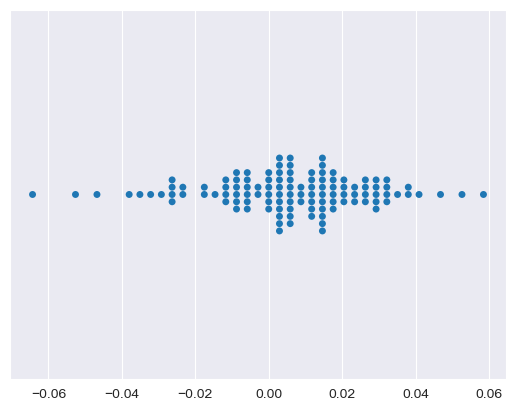

In [23]:
pre, post = all_df.loc[:, '1d-cube-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=1.1239673038967637, pvalue=0.13169405196590808, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

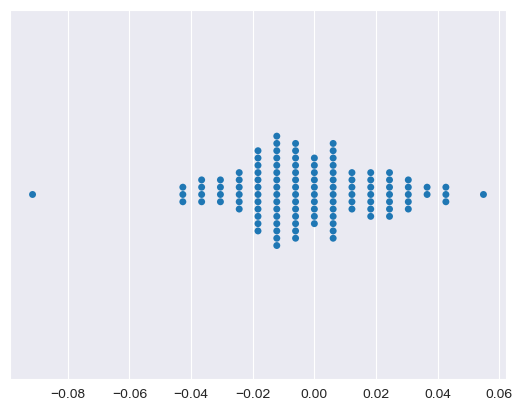

In [19]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=0.40228332380092463, pvalue=0.3441144065933724, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

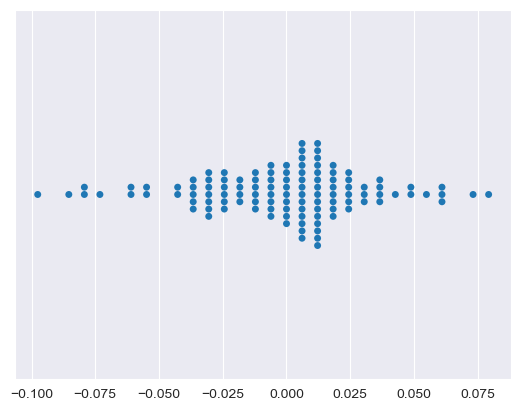

In [20]:
pre, post = all_df.loc[:, '2d-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


In [27]:
socfb_df.loc[socfb_df.hyperbolic < 0.9, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,3d-girg
"Betweenness,Closeness,Effective Diameter - mean",0.963636,0.863636,0.813636,0.831818,0.827273
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",1.0,0.795455,0.786364,0.804545,0.813636
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",1.0,0.859091,0.872727,0.854545,0.859091
"Nodes,Edges - mean",0.495455,0.55,0.495455,0.495455,0.495455
"Nodes,Edges,Betweenness - mean",0.968182,0.581818,0.668182,0.618182,0.559091
"Nodes,Edges,Betweenness - median",0.927273,0.831818,0.986364,0.977273,0.972727
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean",0.986364,0.836364,0.809091,0.809091,0.827273
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - median",0.977273,0.872727,0.981818,0.968182,0.963636
"Nodes,Edges,Centrality.CoreDecomposition - median",0.986364,0.813636,0.790909,0.822727,0.813636
"Nodes,Edges,Closeness - mean",0.886364,0.709091,0.709091,0.695455,0.759091


In [29]:
not_socfb_df.loc[not_socfb_df.hyperbolic < 0.8, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,3d-girg
"Betweenness,Closeness,Diameter Max - mean",0.738889,0.566667,0.505556,0.5,0.527778
"Betweenness,Closeness,Diameter Max - median",0.9,0.594444,0.633333,0.622222,0.672222
"Betweenness,Closeness,Diameter Max - stats",0.955556,0.661111,0.661111,0.666667,0.655556
"Betweenness,Closeness,Effective Diameter - mean",0.544444,0.6,0.516667,0.511111,0.522222
"Betweenness,Closeness,Effective Diameter - median",0.866667,0.6,0.638889,0.661111,0.666667
...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - median",0.761111,0.688889,0.722222,0.705556,0.755556
"Nodes,Edges,Partition.Communities - stats",0.855556,0.716667,0.744444,0.727778,0.727778
"Nodes,Edges,Partition.CoreDecomposition - mean",0.833333,0.644444,0.666667,0.666667,0.694444
"Nodes,Edges,Partition.CoreDecomposition - median",0.716667,0.616667,0.65,0.65,0.65
